# DT Classifier

In [33]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## Import the dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Basic EDA

In [3]:
df.shape

(303, 14)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Null values

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## Filtering

In [10]:
df[df['chol']>300].shape

(43, 14)

In [11]:
df[(df['chol']>300) & (df['age']>40)].shape

(42, 14)

# Visualisation

Text(0.5, 1.0, 'Age distribuition')

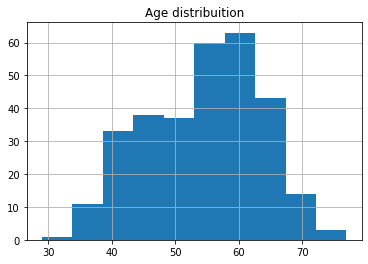

In [12]:
df['age'].hist(grid=True, bins=10) 
plt.title('Age distribuition')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

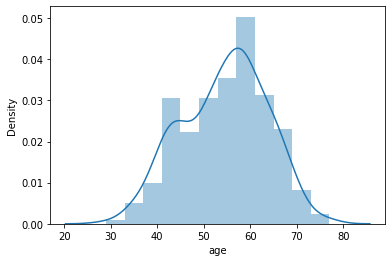

In [13]:
sns.distplot(df['age'])

In the above graph, we can analyse the distribution of Age column, and we can say that there are 60+ people who are having age between 57 to 63.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


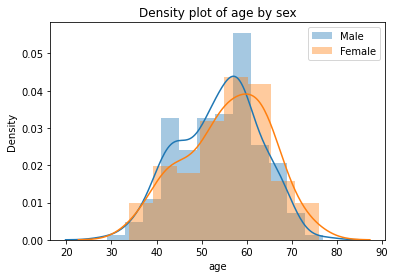

In [14]:
sns.distplot(df[df['sex']==1]['age'],  label='Male')
sns.distplot(df[df['sex']==0]['age'], label='Female')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

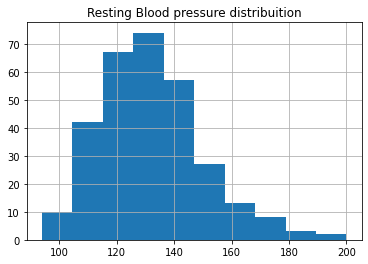

In [15]:
df['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


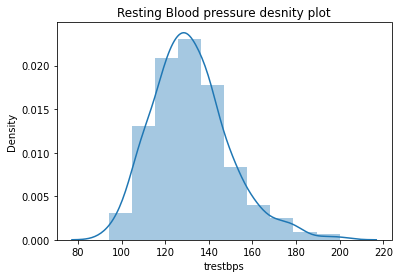

In [16]:
sns.distplot(df['trestbps'], bins=10)
plt.title('Resting Blood pressure desnity plot');

# Correlation heatmap

<AxesSubplot:>

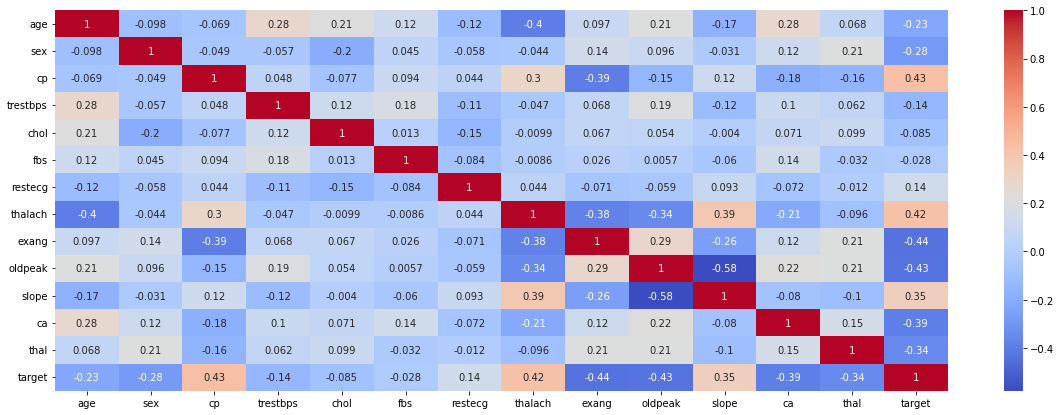

In [19]:
plt.rcParams['figure.figsize'] = (20,7)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Box plot for outliers

<AxesSubplot:xlabel='oldpeak'>

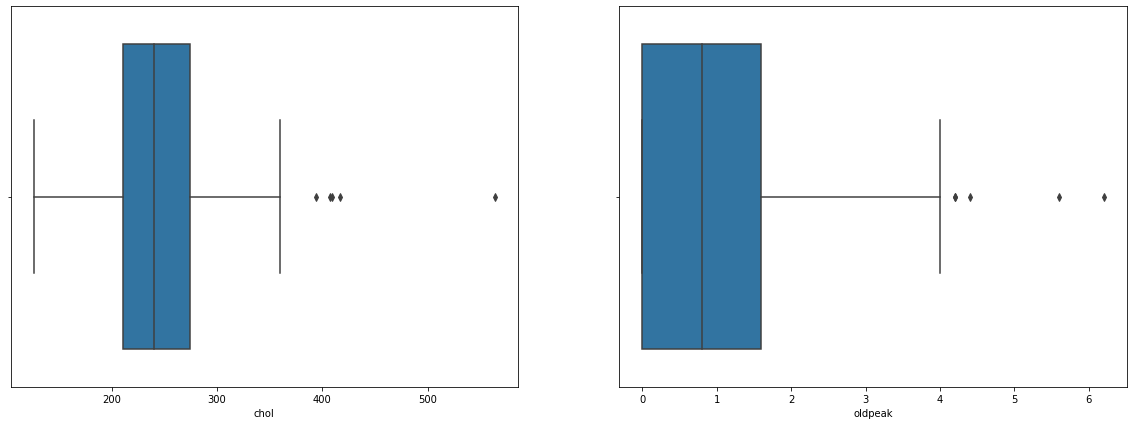

In [20]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
sns.boxplot(x='chol', data=df, ax=axes[0])
sns.boxplot(x='oldpeak', data=df, ax=axes[1])

Text(0.5, 1.0, 'Count of target feature by sex')

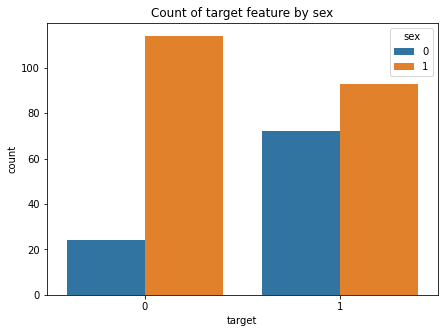

In [21]:
plt.rcParams['figure.figsize'] = (7,5)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.

# Flow of ML model

In [22]:
#supervised model building part-- classification model
#independent and dependent data (x,y)
#divide the data into train and test set (train data and test data)
#create your model (use the function of model)
#train your model (fit function)
#test your model-- predict()
#performance of the model-- accuracy score, confusion matrix, classification_report

In [23]:
X = df.iloc[:, :-1]
y = df['target']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=34, train_size=0.7)

In [25]:
print(x_train.shape)

(212, 13)


In [26]:
print(x_test.shape)

(91, 13)


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
y_test_pred = clf.predict(x_test)

In [30]:
accuracy_score(y_test_pred,y_test)

0.8021978021978022

In [31]:
confusion_matrix(y_test_pred,y_test)

array([[32, 10],
       [ 8, 41]])

In [35]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        42
           1       0.80      0.84      0.82        49

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [ ]:
# hyperparmetre tuning:
# 1. cross validation (K-fold)
# 2. Grid search CV
# 3. Random search cv

[Text(0.4882075471698113, 0.9375, 'cp <= 0.5\ngini = 0.497\nsamples = 212\nvalue = [98, 114]\nclass = a'),
 Text(0.2358490566037736, 0.8125, 'ca <= 0.5\ngini = 0.398\nsamples = 102\nvalue = [74, 28]\nclass = t'),
 Text(0.14150943396226415, 0.6875, 'thal <= 2.5\ngini = 0.5\nsamples = 47\nvalue = [23, 24]\nclass = a'),
 Text(0.07547169811320754, 0.5625, 'exang <= 0.5\ngini = 0.4\nsamples = 29\nvalue = [8, 21]\nclass = a'),
 Text(0.03773584905660377, 0.4375, 'thalach <= 96.5\ngini = 0.188\nsamples = 19\nvalue = [2, 17]\nclass = a'),
 Text(0.018867924528301886, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = t'),
 Text(0.05660377358490566, 0.3125, 'chol <= 316.5\ngini = 0.105\nsamples = 18\nvalue = [1, 17]\nclass = a'),
 Text(0.03773584905660377, 0.1875, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = a'),
 Text(0.07547169811320754, 0.1875, 'slope <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = t'),
 Text(0.05660377358490566, 0.0625, 'gini = 0.0\nsamples = 1\nvalue =

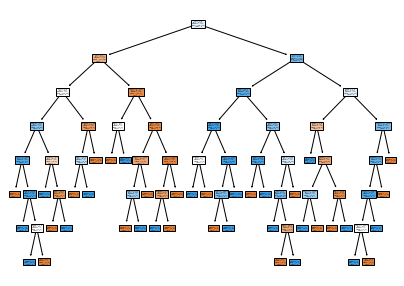

In [36]:
tree.plot_tree(clf,feature_names=X.columns,class_names='target',filled=True)